<a href="https://colab.research.google.com/github/manojmandal27/Huggingface_model/blob/main/Huggingface_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis using LLM

In [ ]:
!pip -q install accelerate -U
!pip -q install transformers[torch]
!pip -q install datasets
#Restart after installing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from transformers import pipeline

In [ ]:
# Textwrp function to display the output in a better format
# This is an optional function, you can ignore it
from IPython.display import HTML, display

def wrap_display():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', wrap_display)

In [ ]:
from transformers import pipeline

Sentiment Anaysis Model

In [ ]:
senti_model = pipeline(task="sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
senti_model('''I recently bought phone, and while I'm impressed with its sleek design and powerful performance,
I've had some challenges with the battery life. The camera quality is outstanding though, making it great for capturing memories on the go.''')

[{'label': 'POSITIVE', 'score': 0.999845027923584}]

In [ ]:
senti_model("This is a bad phone. The screen and battery are of poor quality.")

[{'label': 'NEGATIVE', 'score': 0.9998168349266052}]

Another sentiment model

Prediction the dataset

In [ ]:
from datasets import load_dataset
#import dataset from huggingface for video game reviews
ds = load_dataset("LoganKells/amazon_product_reviews_video_games")
# Access the 'train' dataset and view the first 5 rows
df=ds['train'].to_pandas()
df.head()
#using only 0 rows from 50K rows to show how sentiment analysis works
df1=df.sample(50)
df1['reviewText']



Repo card metadata block was not found. Setting CardData to empty.


19027    this game made Vice City possible and it isn't...
10768    The N64 had Mario Party. PS1 never got a true ...
48999    My family received this as a gift and we all j...
22126    Manhunt, State Of Emergency, GTA series, Resid...
4509     Before I tried this game, I never liked strate...
44399    I gave this game a shot, and after a few month...
22291    EA sports has made another lackluster game. Wi...
14724    I now own Mario Party 1, 2, and 3! All of them...
19934    Luigi's Mansion may not be a straight up winne...
162      ive played this game on my pc when i was reall...
23245    Batman: Dark Tomorrow hs been in development f...
20963    If you've ever wanted to play as a predator or...
11347    This game had so many great improvements since...
19844    If you like a fast-pace shooting game then thi...
18595    It's not difficult to find reviews here which ...
2759     Starcraft is/was definately a ground breaker. ...
23539    Well, I first saw this at the local arcade and.

In [ ]:
df1["Predicted_Sentiment"] = df1["reviewText"].apply(lambda x: senti_model(x)[0]["label"])
df1[["reviewText", "Predicted_Sentiment"]]

,reviewText,Predicted_Sentiment
19027,this game made Vice City possible and it isn't...,NEGATIVE
10768,The N64 had Mario Party. PS1 never got a true ...,POSITIVE
48999,My family received this as a gift and we all j...,POSITIVE
22126,"Manhunt, State Of Emergency, GTA series, Resid...",NEGATIVE
4509,"Before I tried this game, I never liked strate...",POSITIVE
44399,"I gave this game a shot, and after a few month...",NEGATIVE
22291,EA sports has made another lackluster game. Wi...,NEGATIVE
14724,"I now own Mario Party 1, 2, and 3! All of them...",POSITIVE
19934,Luigi's Mansion may not be a straight up winne...,POSITIVE
162,ive played this game on my pc when i was reall...,POSITIVE


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Predicted_Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Predicted_Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='index', y='Predicted_Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

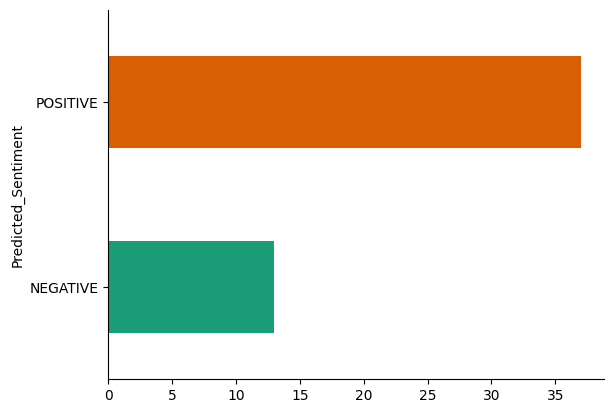

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Predicted_Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Load the model on GPU

In [ ]:
Senti_model_gpu = pipeline(task="sentiment-analysis",
                         model="cardiffnlp/twitter-roberta-base-sentiment-latest",
                         device="cuda")
#No GPU hence error

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
Senti_model_1 = pipeline(task="sentiment-analysis",
                         model="cardiffnlp/twitter-roberta-base-sentiment-latest",
                         )

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
Senti_model_1("This is a bad phone. The screen and battery are of poor quality.")

[{'label': 'negative', 'score': 0.9526489973068237}]

In [ ]:
from datasets import load_dataset
#import dataset from huggingface for video game reviews
ds = load_dataset("LoganKells/amazon_product_reviews_video_games")
# Access the 'train' dataset and view the first 5 rows
df=ds['train'].to_pandas()
df.head()
#using only 0 rows from 50K rows to show how sentiment analysis works
df2=df.sample(50)
df2['reviewText']

Repo card metadata block was not found. Setting CardData to empty.


38537    This is a pretty good game with pretty good le...
13243    MYST was a pioneer game that was ahead of its ...
18575    first off  i loved this game since i got it fo...
11301    No quality, looks cheap, but for the price its...
11142    Boo-hoo, it was tooo hard to play...NONESENSE!...
9882     These Sega Sports games all suffer from the sa...
751      this is an amazing game. one that you can enjo...
25053    Driver 2 Advance does, in many ways, mimic it ...
42272    THE BEST HOCKEY GAME EVER!!!. 2K4 was good but...
24777    Postive1.The game has a great story2.Fantasy f...
47583    It started fine, but was dim.  Then it shut do...
6819     The Genesis days.What fun.What a joy.How depre...
35260    while some people just want to find excuses to...
18307    Holy cow, this game is part of my life for now...
18480    This game is better than any other (except for...
8549     Populous is a great game I control all of my p...
5396     Panzer Dragoon is a great rail shooting game. .

In [ ]:
df2["Predicted_Sentiment"] = df2["reviewText"].apply(lambda x: Senti_model_1(x)[0]["label"])
df2[["reviewText", "Predicted_Sentiment"]]

,reviewText,Predicted_Sentiment
38537,This is a pretty good game with pretty good le...,positive
13243,MYST was a pioneer game that was ahead of its ...,positive
18575,first off i loved this game since i got it fo...,positive
11301,"No quality, looks cheap, but for the price its...",negative
11142,"Boo-hoo, it was tooo hard to play...NONESENSE!...",positive
9882,These Sega Sports games all suffer from the sa...,negative
751,this is an amazing game. one that you can enjo...,positive
25053,"Driver 2 Advance does, in many ways, mimic it ...",positive
42272,THE BEST HOCKEY GAME EVER!!!. 2K4 was good but...,positive
24777,Postive1.The game has a great story2.Fantasy f...,positive


from matplotlib import pyplot as plt
_df_4['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Predicted_Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Predicted_Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='Predicted_Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

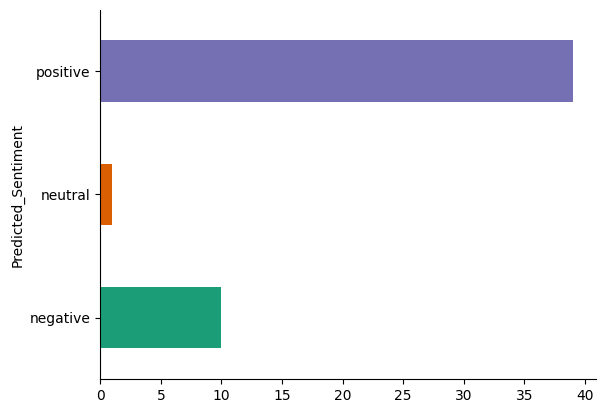

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Predicted_Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Sentiment Analysis without using pipeline function
Here we will create the output values as defined by user

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
import numpy as np
#Input Text
raw_text = "This is a nice place"

#tokenizing the code
encoded_input = tokenizer(raw_text, return_tensors='pt')

#output and getting the predictions 0 : Negative 1: Neutral 2: Positive the information is present in model description that is being used
output = model(**encoded_input)
logits = output.logits.detach().numpy()
y_pred = np.argmax(logits)
y_pred

2

In [ ]:
import numpy as np
# Prepare the input texts
texts = [
    "This is a nice place",
    "The trip was not cozy and it was very cold",
    "The weather is very good today",
]

# Tokenize and encode the input texts
encoded_inputs = tokenizer(texts, padding=True, return_tensors="pt")

# Pass the encoded inputs to the model
outputs = model(**encoded_inputs)

# Get the model's predictions
logits = outputs.logits.detach().cpu().numpy()

# Find the predicted class for each input
predictions = np.argmax(logits, axis=1)

# Print the predictions
print(predictions)

[2 0 2]


Here the model has redicted sentiments as
Statement-1 : Positive
Statement-2 : Neutral
Statement-3 : Positive